In [1]:
import sys
import os
import json
sys.path.append(os.environ["CODE_REPOSITORY"])
from code_repository.hotones.thetools import *
from code_repository.load.load_simulations import LoadSimulations
import matplotlib.pyplot as plt

In [2]:
external = os.path.join("/media","jofrony","2TB", 
                        "dardel", "current_bgd2","ablation", 
                        "supercomputer", "networks")
repository = os.path.join("/home","jofrony","Documents",
                          "Repositories","current_bgd2",
                          "ablation","supercomputer","networks")

In [3]:
folder = "rates"

In [4]:
e = Experiments()
e.add_experiment(name="current_injection",
                 color="black",
                 label="0.5 sec",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-24"),
                 output="network_output_500ms_network-synapses_cell_ids_current_injection_dardel_2022-09-19-13-01-25.hdf5")
e.add_experiment(name="current_injection-iSPN",
                 color="black",
                 label="0.5 sec stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-24"),
                 output="network_output_500ms_ablations-iSPN-iSPN-iSPN-dSPN-network-synapses_cell_ids_current_injection_dardel_2022-09-19-13-01-25.hdf5") 
e.add_experiment(name="current_injection-SPN",
                 color="black",
                 label="0.5 sec stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-24"),
                 output="network_output_500ms_ablations-SPN-network-synapses_cell_ids_current_injection_dardel_2022-09-19-13-01-25.hdf5")

e.experiments     

{'current_injection': {'color': 'black',
  'label': '0.5 sec',
  'network': 'network-synapses.hdf5',
  'path': '/media/jofrony/2TB/dardel/current_bgd2/ablation/supercomputer/networks/pdc_network_2022-08-24',
  'output': 'network_output_500ms_network-synapses_cell_ids_current_injection_dardel_2022-09-19-13-01-25.hdf5'},
 'current_injection-iSPN': {'color': 'black',
  'label': '0.5 sec stimulation',
  'network': 'network-synapses.hdf5',
  'path': '/media/jofrony/2TB/dardel/current_bgd2/ablation/supercomputer/networks/pdc_network_2022-08-24',
  'output': 'network_output_500ms_ablations-iSPN-iSPN-iSPN-dSPN-network-synapses_cell_ids_current_injection_dardel_2022-09-19-13-01-25.hdf5'},
 'current_injection-SPN': {'color': 'black',
  'label': '0.5 sec stimulation',
  'network': 'network-synapses.hdf5',
  'path': '/media/jofrony/2TB/dardel/current_bgd2/ablation/supercomputer/networks/pdc_network_2022-08-24',
  'output': 'network_output_500ms_ablations-SPN-network-synapses_cell_ids_current_injec

In [5]:
sl = LoadSimulations(experiments=e)
sl.load_network_file(load_synapses=False)

Loading 20000 neurons with 15856878 synapses and 2434 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/ablation/supercomputer/networks/pdc_network_2022-08-24/simulation/network_output_500ms_network-synapses_cell_ids_current_injection_dardel_2022-09-19-13-01-25.hdf5
Loading 20000 neurons with 15856878 synapses and 2434 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/ablation/supercomputer/networks/pdc_network_2022-08-24/simulation/network_output_500ms_ablations-iSPN-iSPN-iSPN-dSPN-network-synapses_cell_ids_current_injection_dardel_2022-09-19-13-01-25.hdf5
Loading 20000 neurons with 15856878 synapses and 2434 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/ablation/supercomputer/networks/pdc_network_2022-08-24/simulation/network_output_500ms_ablations-SPN-network-synapses_cell_ids_current_injection_dardel_2022-09-19-13-01-25.hdf5


In [6]:
%%time
neuron_type = "dSPN"
trace_ids = sl.get_trace_ids(neuron_type=neuron_type)
tmp = dict()
for name in e.experiments:
    spikes = sl.get_spikes(name=name, trace_ids=trace_ids[name])
    sub_spikes = {r:s for r,s in spikes.items() if len(s)>0}
    tmp.update({name: sub_spikes})


CPU times: user 1min 14s, sys: 7.84 s, total: 1min 21s
Wall time: 8min 17s


In [7]:
colors = {"current_injection": striatum_colour_code[neuron_type],
         "current_injection-iSPN": (166/255,27/255,26/255) ,
         "current_injection-SPN":  (127/255,42/255,255/255)}

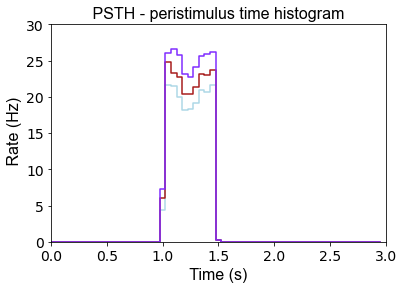

In [8]:
fig_name = f"{neuron_type}_iSPN"
time_histogram(spike_train_dict=tmp, experiment_names=e,colors=colors,fig_name=fig_name,bin_size=50e-3, t_stop=3, parameters={plt.xlim: (0,3), plt.ylim: (0,30)}, save=True, folder=folder)

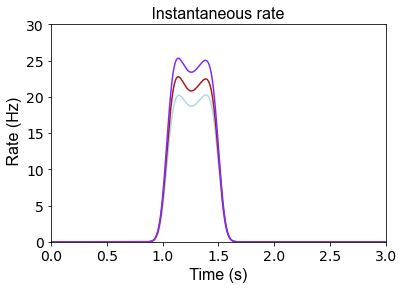

In [9]:
fig_name = f"{neuron_type}_iSPN"
instantaneous_rate(spike_train_dict=tmp, experiment_names=[*e.experiments.keys()],colors=colors, t_stop=3, fig_name=fig_name,folder=folder,parameters={plt.xlim: (0,3), plt.ylim: (0,30)}, save=True,kernel_s=5e-2)

In [10]:
%%time
neuron_type = "iSPN"
trace_ids = sl.get_trace_ids(neuron_type=neuron_type)
tmp = dict()
for name in e.experiments:
    spikes = sl.get_spikes(name=name, trace_ids=trace_ids[name])
    sub_spikes = {r:s for r,s in spikes.items() if len(s)>0}
    tmp.update({name: sub_spikes})


CPU times: user 1min 2s, sys: 4.47 s, total: 1min 6s
Wall time: 4min 32s


In [11]:
colors = {"current_injection": striatum_colour_code[neuron_type],
         "current_injection-iSPN": (166/255,27/255,26/255) ,
         "current_injection-SPN":  (127/255,42/255,255/255)}

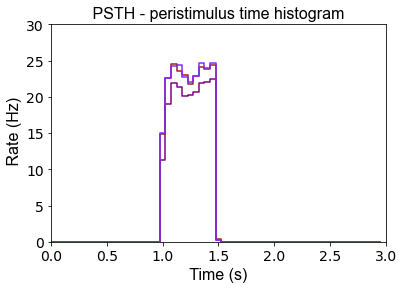

In [12]:
fig_name = f"{neuron_type}_iSPN"
time_histogram(spike_train_dict=tmp, experiment_names=e,colors=colors,fig_name=fig_name,bin_size=50e-3, t_stop=3, parameters={plt.xlim: (0,3), plt.ylim: (0,30)}, save=True, folder=folder)

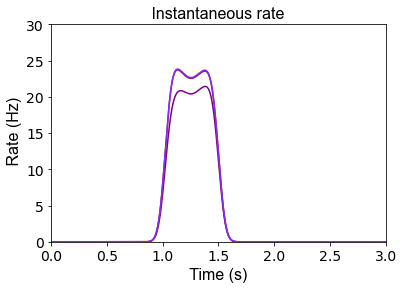

In [13]:
fig_name = f"{neuron_type}_iSPN"
instantaneous_rate(spike_train_dict=tmp, experiment_names=[*e.experiments.keys()],colors=colors, t_stop=3, fig_name=fig_name,folder=folder,parameters={plt.xlim: (0,3), plt.ylim: (0,30)}, save=True,kernel_s=5e-2)